<a href="https://colab.research.google.com/github/FaisalTahair/animal-classifier/blob/main/animal-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CHECKING THE DEPENDENCIES:**

In [1]:
import tensorflow as tf
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from google.colab import files
from google.colab import drive
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
dataset_path = '/content/drive/MyDrive/dataset/'


In [9]:
os.listdir(dataset_path)

['Zebra',
 'Tiger',
 'Panda',
 'Lion',
 'Kangaroo',
 'Horse',
 'Giraffe',
 'Elephant',
 'Dolphin',
 'Dog',
 'Deer',
 'Cow',
 'Cat',
 'Bird',
 'Bear']

In [10]:
#Data preprocessing
def preprocess_images(image_folder, image_size=(224, 224)):
    images, labels = [], []
    for label in os.listdir(image_folder):
        label_path = os.path.join(image_folder, label)
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, image_size)
            images.append(img / 255.0)
            labels.append(label)
    return np.array(images), np.array(labels)
dataset_path = '/content/drive/MyDrive/dataset/'
images, labels = preprocess_images(dataset_path)
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

Images shape: (591, 224, 224, 3)
Labels shape: (591,)


In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

Training data shape: (413, 224, 224, 3)
Validation data shape: (89, 224, 224, 3)
Test data shape: (89, 224, 224, 3)


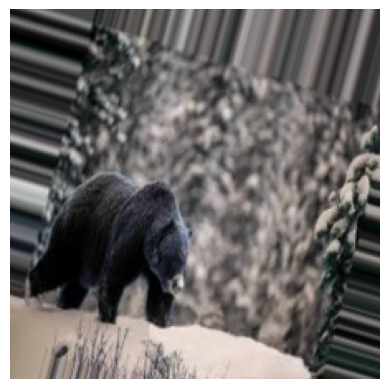

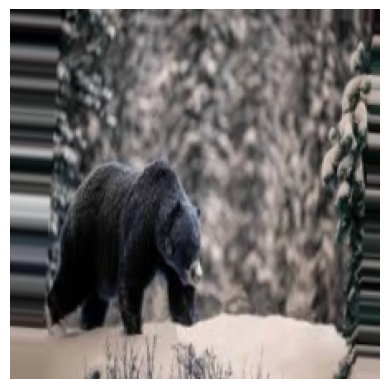

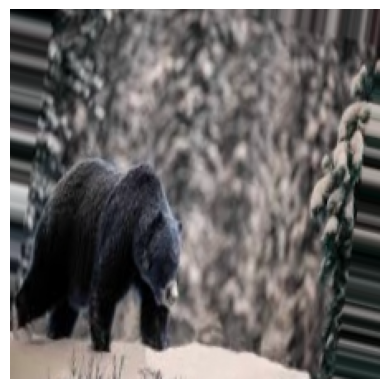

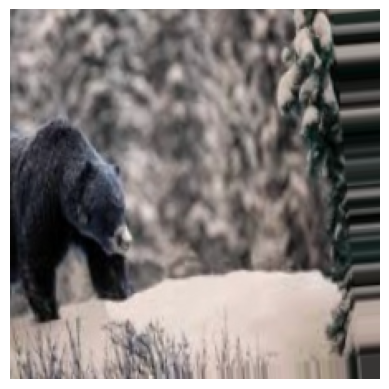

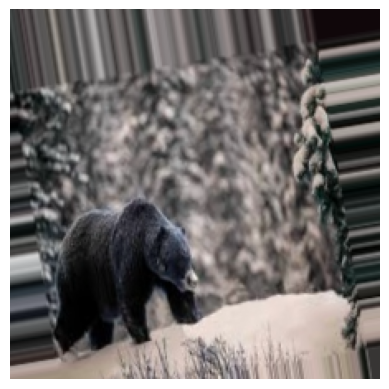

In [12]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)
sample_image = X_train[0]
sample_image = np.expand_dims(sample_image, axis=0)
for i in range(5):
    augmented_image = next(datagen.flow(sample_image, batch_size=1))[0]
    plt.imshow(augmented_image)
    plt.axis('off')
    plt.show()

In [13]:
num_classes = len(os.listdir('/content/drive/MyDrive/dataset/'))


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,887 (9.25 MB)

 Trainable params: 165,903 (648.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [14]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)
print("Encoded training labels:", y_train[:10])
print("Classes:", label_encoder.classes_)

Encoded training labels: [0 0 2 1 2 0 4 1 1 0]
Classes: ['Bear' 'Bird' 'Cat' 'Cow' 'Deer']


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.1044 - loss: 2.8691 - val_accuracy: 0.4382 - val_loss: 1.9489
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.3094 - loss: 2.0027 - val_accuracy: 0.6517 - val_loss: 1.4029
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.5035 - loss: 1.5293 - val_accuracy: 0.6966 - val_loss: 1.0876
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6081 - loss: 1.2259 - val_accuracy: 0.7865 - val_loss: 0.8596
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6710 - loss: 1.0516 - val_accuracy: 0.8315 - val_loss: 0.7073
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7454 - loss: 0.9230 - val_accuracy: 0.8652 - val_loss: 0.6001
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7853 - loss: 0.7655 - val_accuracy: 0.9326 - val_loss: 0.5165
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8072 - loss: 0.6929 - val_accuracy: 0.8989 - val_loss:

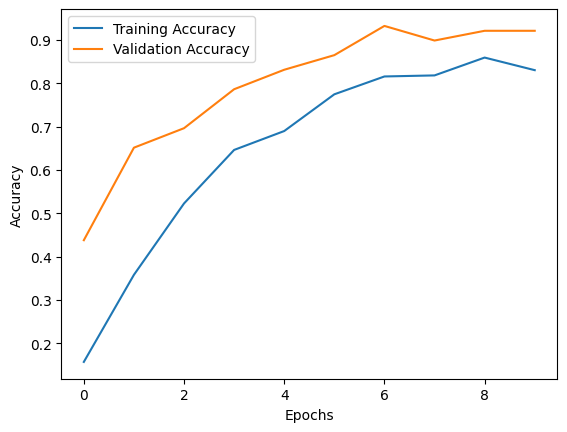

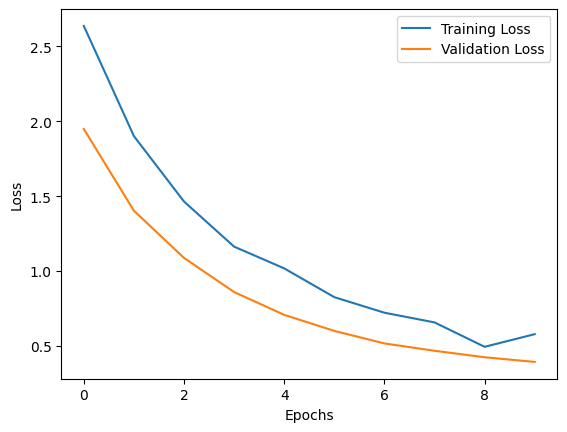

In [15]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_val, y_val),
                    batch_size=32)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Short analysis:

#from above graph --> The model is learning properly.

#It is not just memorizing but actually understanding the patterns.

#No overfitting and no underfitting happening.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)


print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

In [ ]:

model.save('animal_classifier.keras')

